# Diamond Dataset Analysis and Prediction

## Table of Contents
1. [Introduction](#introduction)
2. [Data Analysis](#data-analysis)
   - [Data Overview](#data-overview)
   - [Data Cleaning](#data-cleaning)
   - [Feature Engineering](#feature-engineering)
   - [Data Visualization](#data-visualization)
3. [Machine Learning](#machine-learning)
   - [Problem Definition](#problem-definition)
   - [Data Preparation for Machine Learning](#data-preparation-for-machine-learning)
   - [Model Selection](#model-selection)
   - [Model Evaluation](#model-evaluation)
   - [Prediction](#prediction)


## Introduction
Provide an overview of the project:
- What is the dataset about?  
- Goals of the project:
  - Analyze and visualize diamond attributes.
  - Analysze trends with different attributes, how the target category, res, is affected by other attributes.
  - Built a machine linear regression model to predict a specific parameter (e.g., price).
  - Built a Logistic Regression model to predict if the given diamond is recommended to buy or not on the basis of a multiple features.


### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df =pd.read_csv(r'/Users/aniketyadav/Documents/DS/DataSets/diamonds.csv', header = 0)
df = df.drop("Unnamed: 0", axis =1 )
df['res'] = np.where((df['price']>4500) | (df['carat']>2.9), 1, 0)

In [6]:
data = pd.read_csv(r'/Users/aniketyadav/Documents/DS/DataSets/diamonds.csv', header = 0)

data = data.drop("Unnamed: 0", axis =1 )

data['res'] = np.where((data['price']>4500) | (data['carat']>2.9), 1, 0)

<h3> Data Analysis </h3>

In [7]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
res        0
dtype: int64

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

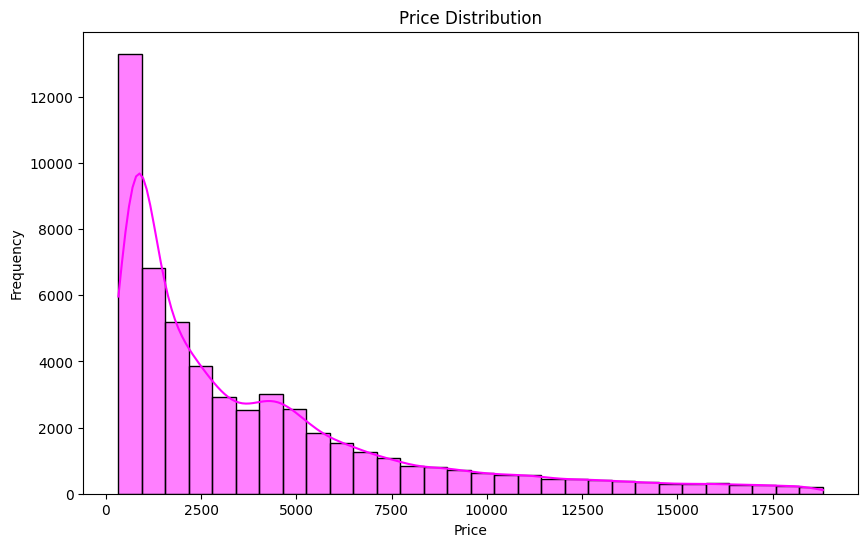

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='magenta')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Price vs Carat
fig = px.scatter(x=df['carat'], y = df['price'], title='Price vs Carat',color=df['cut'], color_continuous_scale=px.colors.sequential.Teal)
fig.update_xaxes(title_text = 'Carat')
fig.update_yaxes(title_text= 'Price')
fig.update_layout(template='plotly_dark')
fig.update_layout(height=600)
fig.show()

# 3. Price by Cut Quality
fig = px.box( df,x='cut',y='price',title='Price by Cut Quality',labels={'cut': 'Cut Quality', 'price': 'Price'},color='cut') 
fig.update_layout(showlegend=False)
fig.update_layout(template='plotly_dark')
fig.update_layout(height=600)
fig.show()


# 4. Price by Color
fig = px.box(
    df,
    x='color',
    y='price',
    title='Price by Color',
    labels={'color': 'Color', 'price': 'Price'},
    color='color'  # Optional: Add color by color categories
)
fig.update_layout(showlegend=False)
fig.update_layout(template='plotly_dark')
fig.update_layout(height=600)
fig.show()

# 5. Price by Clarity
fig = px.box(
    df,
    x='clarity',
    y='price',
    title='Price by Clarity',
    labels={'clarity': 'Clarity', 'price': 'Price'},
    color='clarity'
)
fig.update_layout(showlegend=False)
fig.update_layout(template='plotly_dark')
fig.update_layout(height=600)
fig.show()

# 6. Correlation Matrix

import plotly.figure_factory as ff
correlation_matrix = data.select_dtypes(include='number').corr()


z = np.round(correlation_matrix.values, 2) 

fig = ff.create_annotated_heatmap(
    z=z,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='inferno',
    showscale=True,
    annotation_text=[[f"{value:.2f}" for value in row] for row in z], 
)

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
)
fig.update_layout(height=600)
fig.update_layout(template='plotly_dark')

fig.show()

<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

In [9]:
px.bar(kn, barmode='group')

NameError: name 'kn' is not defined

In [19]:
kn = data.pivot_table(index='cut', columns='clarity', values='price')
fig=px.line(kn, template='plotly_dark')
fig.update_layout(width=1200)


<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

In [14]:
groupdata1 = data.groupby('cut')['price'].mean()
groupdata1 = groupdata1.reset_index()

In [15]:
px.pie(groupdata1, names='cut', values='price', hole=0.5)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

In [10]:
groupdata2 = data.groupby('carat')['price'].mean()
groupdata2=groupdata2.reset_index()


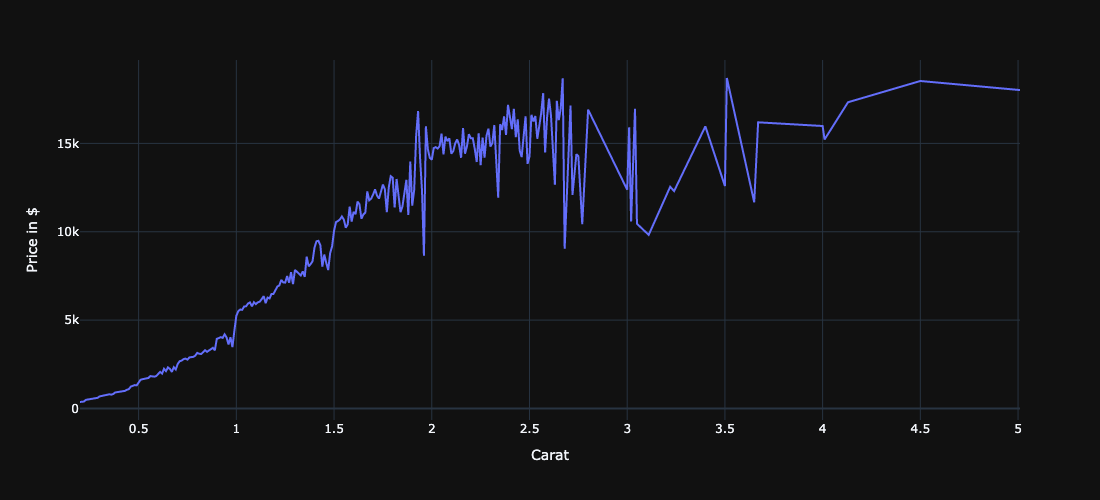

In [15]:
fig = px.line(x= groupdata2['carat'], y=groupdata2['price'], template='plotly_dark')
fig.update_layout(height=500, width=1100)
fig.update_xaxes(title_text='Carat')
fig.update_yaxes(title_text = 'Price in $')
fig.show(renderer="png")



<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

In [18]:
fig = px.bar(x=groupdata1['cut'],y=groupdata1['price'], color=groupdata1['cut'], template='plotly_dark', title='Price VS Cut')
fig.update_xaxes(tickvals=[0,1,2,3,4], ticktext=['Fair','Good','Ideal','Premium','Very Good'], title_text='Cut')
fig.update_yaxes(title_text='Price')
fig.update_layout(showlegend=False)
fig.update_layout(height=700)
fig.show()

<Axes: xlabel='clarity'>

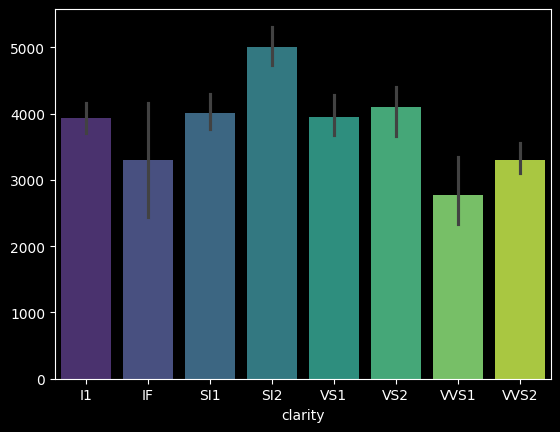

In [49]:
plt.style.use("dark_background")
sns.barplot(kn, palette='viridis')

<h3 style = 'color:pink'> Machine Learning </h3>

In [21]:
import plotly.graph_objects as go

x = [0, 3.89, -3.89, 0, 0]  # Lengths (front and back vertices)
y = [0, 0, 0, 3.84, -3.84]  # Widths (sides of the diamond)
z = [2.31, 0, 0, 0, 0]      # Depths (top and base of the diamond)

# Define triangular faces for the diamond
i = [0, 0, 0, 1, 2]  # Indices of the first vertex of each triangle
j = [1, 2, 3, 3, 4]  # Indices of the second vertex of each triangle
k = [2, 3, 4, 4, 1]  # Indices of the third vertex of each triangle

# Create a 3D Mesh plot
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=x,
            y=y,
            z=z,
            i=i,  # Define triangular faces
            j=j,
            k=k,
            color='blue',
            opacity=0.5,
        )
    ]
)

# Update layout for better visualization
fig.update_layout(
    title="3D Diamond Representation",
    scene=dict(
        xaxis_title='X (Length)',
        yaxis_title='Y (Width)',
        zaxis_title='Z (Depth)',
    )
)

# Show the figure
fig.show()

In [22]:
import plotly.graph_objects as go

# Example Data
datajj = {
    "labels": ["Start", "Sales", "Returns", "Marketing", "Profit"],
    "values": [1000, 400, -200, -300, 900]
}

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    x=datajj["labels"],
    y=datajj["values"],
    text=["$1000", "$400", "-$200", "-$300", "$900"],
    textposition="outside",
    connector={"line": {"color": "blue", "dash": "dot"}},
    decreasing={"marker": {"color": "magenta"}},
    increasing={"marker": {"color": "cyan"}},
    totals={"marker": {"color": "blue"}}
))
fig.update_layout(
    title="Waterfall Chart",
    xaxis_title="Stages",
    yaxis_title="Values",
    template='plotly_dark'
)

fig.show()

In [23]:
data

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       res  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
53935    0  
53936    0  
53937    0  
53938    0  
53939    0  

[53940 rows x 11 columns]

In [24]:
categories = ['A', 'B', 'C', 'D']
values = [10, 15, 7, 12]

# Create bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=categories,
    y=values,
    opacity=0.7,
    marker=dict(
        color='purple',          
        line=dict(
            color='magenta',            
            width=3                  
        )
    )
))
fig.update_layout(
    title='Bar Plot with Bold Outline and Light Inner Fill',
    xaxis_title='Categories',
    yaxis_title='Values',
    template='plotly_dark',
    height=500,
    width=700
)

fig.show()

In [25]:
dfll = {
    'Category1': ['A', 'B', 'A', 'C', 'B'],
    'Category2': ['X', 'Y', 'Z', 'X', 'Y'],
    'Category3': ['P', 'Q', 'P', 'Q', 'P']
}

dfll = pd.DataFrame(dfll)

# Create the parallel sets plot
fig = px.parallel_categories(dfll, dimensions=['Category1', 'Category2', 'Category3'])

# Show the plot
fig.show()

In [26]:
spk = data[['color','cut','clarity']].head(10)

In [27]:
px.parallel_categories(spk)